In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Reading data files 

In [2]:
def readFile(fileName):
    data = []
    file = open(fileName, "r")
    for line in file:
        l = line.strip().split()
        l = [int(i) for i in l]
        data.append(l)
    return data

In [3]:
train3 = readFile(r"train3.txt")
train5 = readFile(r"train5.txt")
test3 = readFile(r"test3.txt")
test5 = readFile(r"test5.txt")

In [4]:
train = np.array(train3 + train5)
ytrain = np.array([0]*len(train3)+[1]*len(train5))

In [5]:
test = np.array(test3 + test5)
ytest = np.array([0]*len(test3)+[1]*len(test5))

## Helper functions

In [6]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

def log_likelihood(y,y_pred):
    return sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))

def error(X,y,w):
    cor = 0
    pred = sigmoid(np.dot(X,w))
    ypred = []
    for i in range(pred.shape[0]):
        if(pred[i]>=0.5):
            ypred.append(1)
        else:
            ypred.append(0)
    acc = sum(y==ypred)/len(ypred)
    return 1 - acc

## Gradient Ascent Algorithm

In [7]:
def gradientAscent(X,y,n_iter,lr):
    weights = np.zeros(X.shape[1])
    
    logl = []
    steps = [] 
    err = []

    for i in range(n_iter):
        
        p = np.dot(X,weights)
        y_pred = sigmoid(p)
            
        gradient = np.mean((y-y_pred)*X.T, axis=1)
        weights = weights + gradient*lr
            
        ll = log_likelihood(y,y_pred)
        e = error(X,y,weights)
        
        err.append(e)
        steps.append(i+1)
        logl.append(ll)
        
        if((i+1)%20==0):
            print("Iteration: "+str(i+1)+"   "+"Log-likelihood: "+str(ll.round(2))+"   "+"Error: "+str(e.round(4)))
        
    return logl,err,steps,weights

## Training

In [8]:
logl,err,steps,weights = gradientAscent(train,ytrain,500,0.2)

Iteration: 20   Log-likelihood: -511.01   Error: 0.0907
Iteration: 40   Log-likelihood: -399.31   Error: 0.0771
Iteration: 60   Log-likelihood: -348.04   Error: 0.07
Iteration: 80   Log-likelihood: -317.64   Error: 0.0664
Iteration: 100   Log-likelihood: -297.12   Error: 0.0593
Iteration: 120   Log-likelihood: -282.15   Error: 0.0579
Iteration: 140   Log-likelihood: -270.64   Error: 0.055
Iteration: 160   Log-likelihood: -261.46   Error: 0.0536
Iteration: 180   Log-likelihood: -253.93   Error: 0.0529
Iteration: 200   Log-likelihood: -247.61   Error: 0.0507
Iteration: 220   Log-likelihood: -242.22   Error: 0.0507
Iteration: 240   Log-likelihood: -237.56   Error: 0.0507
Iteration: 260   Log-likelihood: -233.47   Error: 0.0507
Iteration: 280   Log-likelihood: -229.85   Error: 0.05
Iteration: 300   Log-likelihood: -226.63   Error: 0.05
Iteration: 320   Log-likelihood: -223.73   Error: 0.05
Iteration: 340   Log-likelihood: -221.1   Error: 0.05
Iteration: 360   Log-likelihood: -218.71   Erro

## Log likelihood vs iterations

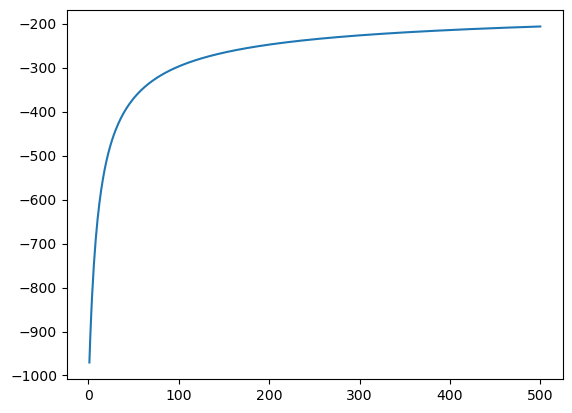

In [9]:
plt.plot(steps,logl)
plt.show()

## Error vs iterations

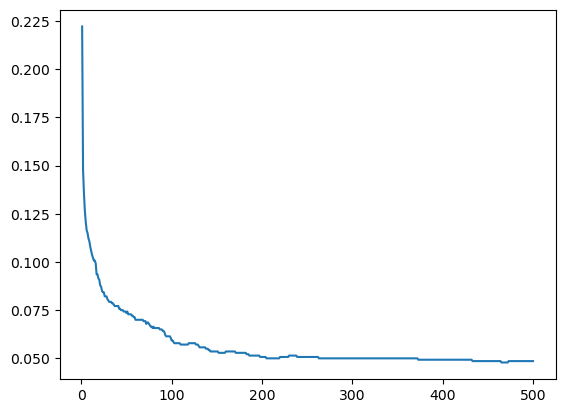

In [10]:
plt.plot(steps,err)
plt.show()

## Learned Weights

In [11]:
print("The weights after converegence are:\n")
for i in range(8):
    print(weights[8*i:8*(i+1)].round(5))

The weights after converegence are:

[-0.49227 -0.66021 -0.72295 -0.72301 -0.64622 -0.08649  0.72691  1.0844 ]
[ 0.04708  0.09251  0.03877  0.06994  0.0898   0.33809 -0.47234 -0.7491 ]
[ 1.09804  1.05806  0.95369  0.46509  0.1226  -1.03069 -1.86458 -1.43338]
[ 0.57145  0.61474  0.30628 -0.14774 -0.44498 -0.85894 -0.18747 -0.17581]
[ 0.33128  0.42983  0.03133 -0.15032 -0.38801 -0.34526 -0.07924 -0.36061]
[ 0.57095 -0.01053 -0.11464  0.13262  0.11771 -0.14103  0.24582 -0.63003]
[ 0.65263 -0.03142  0.56148  0.22866  0.08691 -0.04741  0.2293  -0.49028]
[ 0.07836  0.1606   0.36343  0.39462  0.24501  0.40515 -0.00832 -0.20718]


## Performance on test data

In [12]:
e = error(np.array(test3),np.array([0]*len(test3)),weights)
print("Error on test3 data: "+str(e.round(4)))

e = error(np.array(test5),np.array([1]*len(test5)),weights)
print("Error on test5 data: "+str(e.round(4)))

e = error(test,ytest,weights)
print("Error on combined test data: "+str(e.round(4)))

Error on test3 data: 0.055
Error on test5 data: 0.045
Error on combined test data: 0.05
